In [1]:
import began
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import astropy.units as units
import camb
from camb import model, initialpower
from began.visualization import mplot, plot

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
#cl = np.array([powers['total'][k] for k in ['tt', 'ee', 'bb', 'te']])

In [3]:
nside = 512
t, q, u = hp.synfast(powers['total'].T, nside, new=True, pol=True, verbose=False)
t, q, u = hp.smoothing((t, q, u), fwhm=0.5 * np.pi / 180., verbose=False)
m = np.array((t, q, u))

In [6]:
ang_x = 20. * units.deg
ang_y = 20 * units.deg

theta_c = 15. * units.deg
phi_c = 15. * units.deg

fc = began.FlatCutter(ang_x, ang_y, 256, 256)

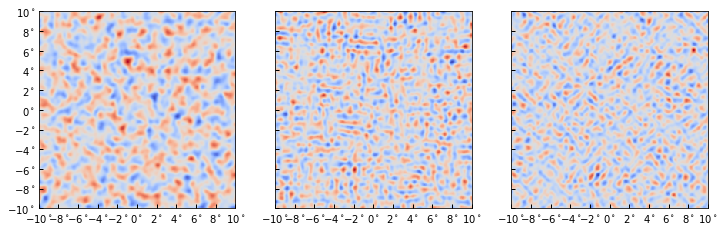

In [7]:
out = fc.rotate_and_interpolate(theta_c, phi_c, m)
fig, ax = mplot(out, extent=(-10, 10, -10, 10))

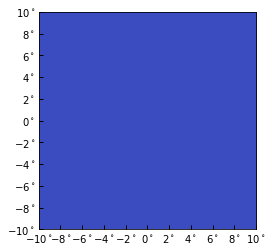

In [13]:
npix = hp.nside2npix(nside)
k = np.zeros_like(m)
lat_c, lon_c = 15. * units.deg, 20. * units.deg 
k[:, hp.query_disc(nside, hp.ang2vec(lat_c.to(units.rad), lon_c.to(units.rad)), 3.*np.pi/180.)] = 1

out = fc.rotate_and_interpolate(lat_c, lon_c, k[0])
fig, ax = plot(out[0], extent=(-10, 10, -10, 10))

In [19]:
lat_c = 10. * np.pi / 180.
lon_c = 10. * np.pi / 180.
lat_c = 10
lon_c = 10
rotator = hp.Rotator(rot=[lon_c, lat_c], deg=True)

In [20]:
out = rotator(lat_c, lon_c, lonlat=True)
print(out)

[0. 0.]


In [8]:
rotator.I(out)

array([ 0.17453293, -2.96705973])

In [295]:
rotator(lat_c.to(units.rad), lon_c.to(units.rad))

AttributeError: 'int' object has no attribute 'to'

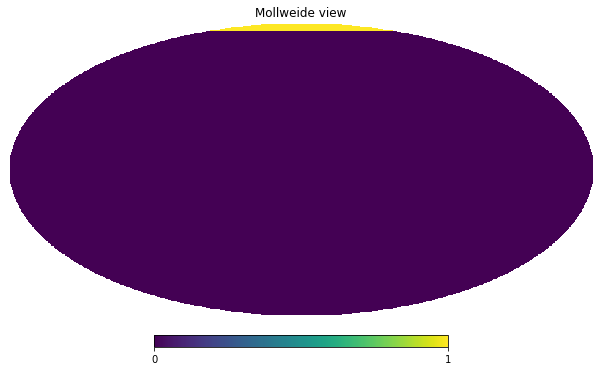

In [181]:
vec = np.array([0., 0., 1.])
patch = hp.query_disc(nside, vec, 10. * np.pi / 180.)
z = np.zeros_like(q)
z[patch] = 1
hp.mollview(z)

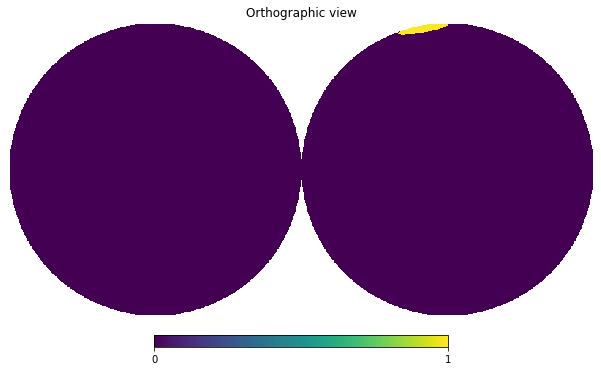

In [91]:
xgrid, ygrid = np.meshgrid(np.linspace(-10 * np.pi / 180., 10 * np.pi / 180., 10), np.linspace(-10 * np.pi / 180., 10 * np.pi / 180., 10))
xgrid = xgrid.ravel()
ygrid = ygrid.ravel()
zgrid = np.ones_like(ygrid)
# vectors corresponding to cartesian grid around poll
vecs = np.empty((len(xgrid), 3), dtype=np.float32)
vecs[:, 0] = xgrid
vecs[:, 1] = ygrid
vecs[:, 2] = zgrid

patch = hp.query_disc(nside, vecs[1], 10. * np.pi / 180.)
z = np.zeros_like(q)
z[patch] = 1
hp.orthview(z)

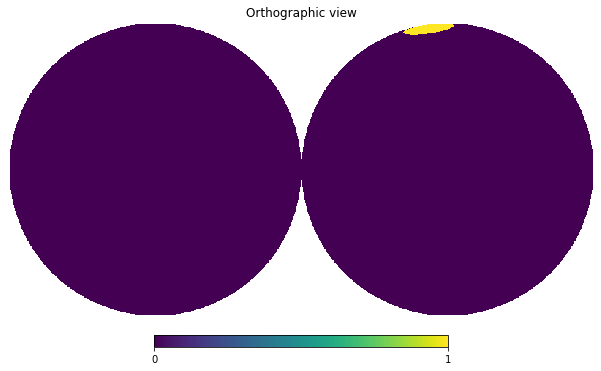

In [98]:
xgrid, ygrid = np.meshgrixgrid, ygrid = np.meshgrid(np.linspace(-10 * np.pi / 180., 10 * np.pi / 180., 10), np.linspace(-10 * np.pi / 180., 10 * np.pi / 180., 10))
xgrid = xgrid.ravel()[None, :]
ygrid = ygrid.ravel()[None, :]
zgrid = np.ones_like(ygrid)
# vectors corresponding to cartesian grid around poll
vecs = np.concatenate((xgrid, ygrid, zgrid)).T

patch = hp.query_disc(nside, vecs[10], 10. * np.pi / 180.)
z = np.zeros_like(q)
z[patch] = 1
hp.orthview(z)

In [100]:
lat, lon = hp.vec2ang(vecs)

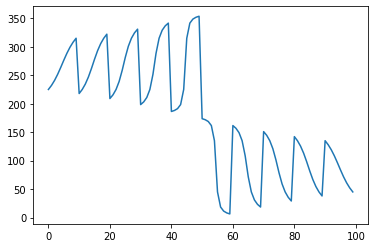

In [104]:
plt.plot(lon * 180. / np.pi)

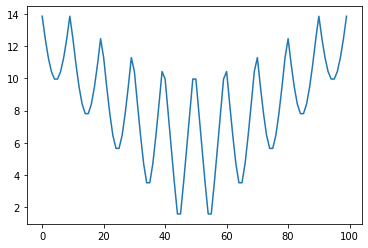

In [191]:
plt.plot(lat * 180. / np.pi)

In [192]:
lat

array([0.24198993, 0.21760792, 0.19706717, 0.1819394 , 0.17383455,
       0.17383455, 0.1819394 , 0.19706717, 0.21760792, 0.24198993,
       0.21760792, 0.18966881, 0.16529883, 0.14662927, 0.1362761 ,
       0.1362761 , 0.14662927, 0.16529883, 0.18966881, 0.21760792,
       0.19706717, 0.16529883, 0.1362761 , 0.11259872, 0.09856257,
       0.09856257, 0.11259872, 0.1362761 , 0.16529883, 0.19706717,
       0.1819394 , 0.14662927, 0.11259872, 0.08209071, 0.06124792,
       0.06124792, 0.08209071, 0.11259872, 0.14662927, 0.1819394 ,
       0.17383455, 0.1362761 , 0.09856257, 0.06124792, 0.02741833,
       0.02741833, 0.06124792, 0.09856257, 0.1362761 , 0.17383455,
       0.17383455, 0.1362761 , 0.09856257, 0.06124792, 0.02741833,
       0.02741833, 0.06124792, 0.09856257, 0.1362761 , 0.17383455,
       0.1819394 , 0.14662927, 0.11259872, 0.08209071, 0.06124792,
       0.06124792, 0.08209071, 0.11259872, 0.14662927, 0.1819394 ,
       0.19706717, 0.16529883, 0.1362761 , 0.11259872, 0.09856